# Image Modifications

first import the necessary modules

In [1]:
import cv2
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import skeletonize, binary_erosion, dilation, erosion, square
from skimage.filters import sobel
from skimage.feature import canny
from skimage.segmentation import felzenszwalb, find_boundaries
from scipy import ndimage as ndi
from PIL import Image

than we setup the loading path and display the image

filename ../images/liver/liver_healthy.bmp
dir /home/markus/Programming/lcmd/code
filename ../images/liver/liver_healthy.bmp
dir /home/markus/Programming/lcmd/code


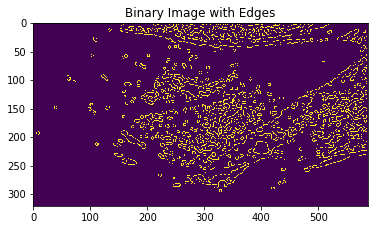

In [2]:
img_liver_path = '../images/liver/liver_cirrhosis_1.png'
img_liver_healthy_path = '../images/liver/liver_healthy.png'
img_liver = cv2.imread(img_liver_path)
img_inverted = 255 - img_liver
img_gray = img_liver[:,:,0]


image = cv2.imread("../images/liver/liver_healthy.bmp")
Second_Image=rgb2gray(plt.imread("../images/liver/liver_healthy.bmp"))

Binary_Image=rgb2gray(plt.imread("../images/liver/liver_healthy.bmp"))
threshold = 0.4
Binary_Image[Binary_Image < threshold] = 0
Binary_Image[Binary_Image >= threshold] = 1

edg_bin=canny(Binary_Image, sigma=2)
  
plt.title("Binary Image with Edges")
plt.imshow(edg_bin)

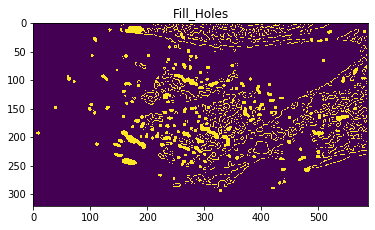

In [3]:
fill_bin = ndi.binary_fill_holes(edg_bin)
plt.title('Fill_Holes')
plt.imshow(fill_bin)

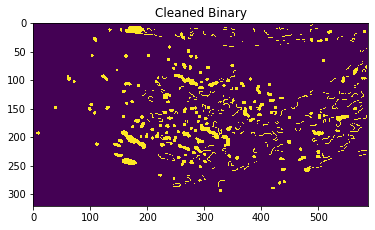

In [4]:
cleaned = morphology.remove_small_objects(fill_bin, 15)
plt.title("Cleaned Binary")
plt.imshow(cleaned)

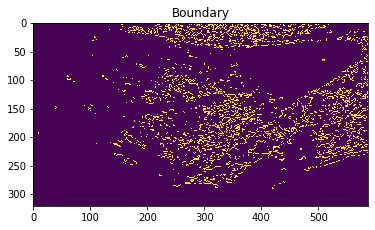

In [5]:
boundary = Binary_Image - binary_erosion(Binary_Image)
plt.title("Boundary")
plt.imshow(boundary)

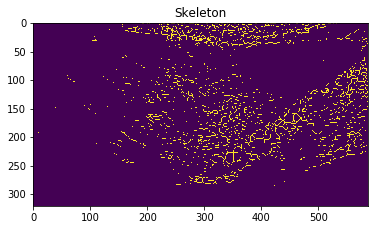

In [6]:
skeleton = skeletonize (Binary_Image)
plt.title("Skeleton")
plt.imshow(skeleton)

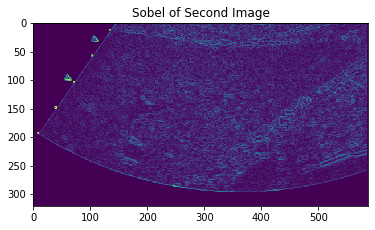

In [7]:
sob = sobel(Second_Image)
plt.title("Sobel of Second Image")
plt.imshow(sob)

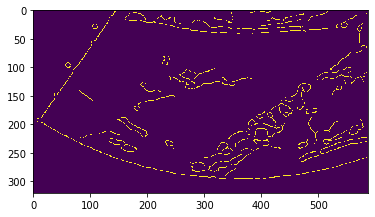

In [8]:
edg = canny(Second_Image, sigma=3)
plt.show("Canny of Second Image")
plt.imshow(edg)

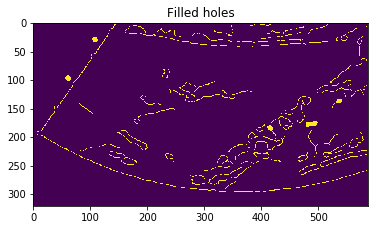

In [9]:
fill = ndi.binary_fill_holes(edg)
plt.title("Filled holes")
plt.imshow(fill)

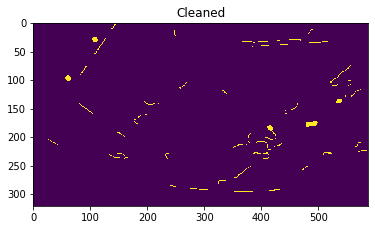

In [10]:
cleaned = morphology.remove_small_objects(fill, 21)
plt.title("Cleaned")
plt.imshow(cleaned)

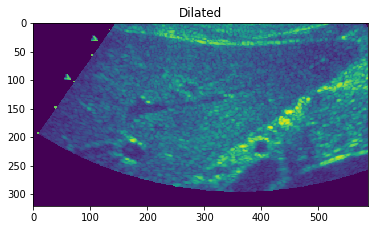

In [11]:
struct_eroded  = square(2)
struct_dilated = square(2)
dilated = dilation(Second_Image, struct_dilated)
plt.title("Dilated")
plt.imshow(dilated)

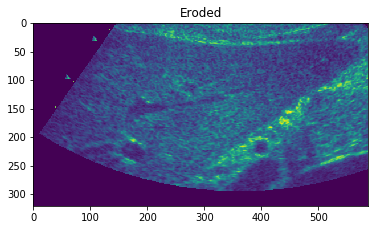

In [12]:
eroded = erosion(Second_Image, struct_eroded)
plt.title("Eroded")
plt.imshow(eroded)

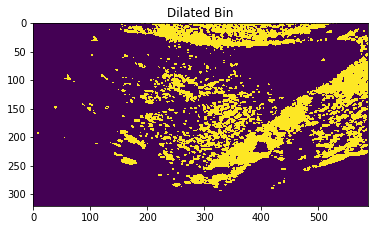

In [13]:
dilated_bin = dilation(Binary_Image, struct_dilated)
plt.title("Dilated Bin")
plt.imshow(dilated_bin)

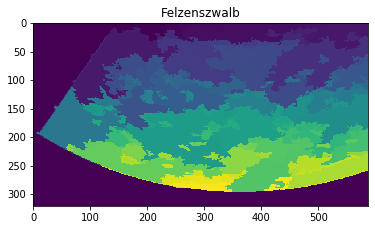

In [14]:
segments_fz = felzenszwalb(Second_Image, scale=100, sigma=0.5, min_size=100)
plt.title("Felzenszwalb")
plt.imshow(segments_fz)

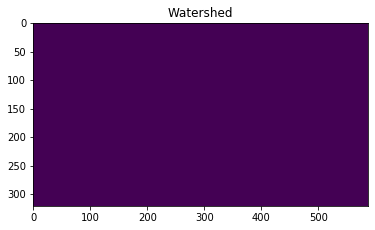

In [15]:
borders = find_boundaries(segments_fz)
unique_colors = np.unique(segments_fz.ravel())
segments_fz[borders] = -1
markers = np.zeros_like(Second_Image)
markers[Second_Image < 30] = 1
markers[Second_Image > 150] = 2
segm_watershed = morphology.watershed(sob, markers)
segm_watershed = ndi.binary_fill_holes(segm_watershed - 1)
plt.title("Watershed")
plt.imshow(segm_watershed)

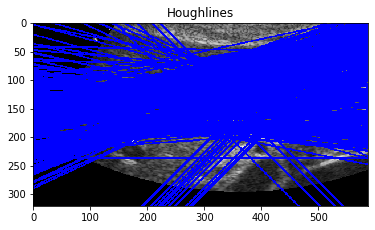

In [16]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(image,50,150, apertureSize = 3)
cv2.imwrite('Canny-CV.jpg',edges)
lines = cv2.HoughLines (edges, 1, np.pi/180,200)
new=edges.copy()
new_image=image.copy()
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(new_image,(x1,y1),(x2,y2),(0,0,255),2)
plt.title('Houghlines')
plt.imshow(new_image)

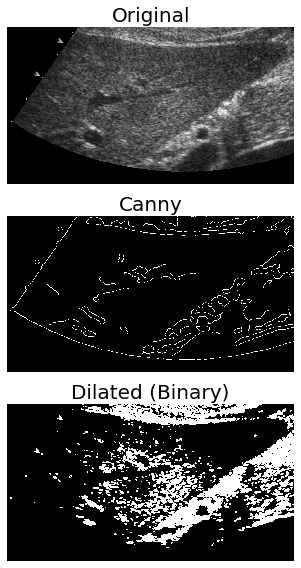

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
ax1.imshow(image, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Original', fontsize=20)
ax2.imshow(edg, cmap=plt.cm.gray)

ax2.axis('off')
ax2.set_title('Canny', fontsize=20)
ax3.imshow(dilated_bin, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Dilated (Binary)', fontsize=20)

fig.tight_layout()
plt.show()

# Testing

---